In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [2]:
# Function to generate a random smiley face image
def generate_smiley_face(size):
    # Generate a blank image
    image = np.zeros((size, size, 3), dtype=np.uint8)

    # Draw a circle for the face
    center = (size // 2, size // 2)
    radius = size // 3
    cv2.circle(image, center, radius, (255, 255, 255), -1)

    return image, center, size

# Function to add landmarks to the smiley face image
def add_landmarks(image, center, size):
    # Define landmark points (e.g., for eyes, nose, and mouth)
    # Example: For a simple smiley face, you might define landmarks for eyes, nose, and mouth
    landmarks = {
        'left_eye': (int(center[0] - size * 0.1), int(center[1] - size * 0.1)),
        'right_eye': (int(center[0] + size * 0.1), int(center[1] - size * 0.1)),
        'nose': (int(center[0]), int(center[1])),
        'mouth_left_top_top': (int(center[0] - size * 0.15), int(center[1] + size *0.05)),
        'mouth_left_top': (int(center[0] - size * 0.1), int(center[1] + size * 0.09)),
        'mouth_top': (int(center[0] - size * 0.05), int(center[1] + size * 0.1)),
        'mouth_middle': (int(center[0] ), int(center[1] + size * 0.1)),
        'mouth_bottom': (int(center[0] + size * 0.05), int(center[1] + size * 0.1)),
        'mouth_right_bottom': (int(center[0] + size * 0.1), int(center[1] + size * 0.09)),
        'mouth_right_bottom_bottom': (int(center[0] + size * 0.15), int(center[1] + size * 0.05))
    }

    # # Add points along the perimeter of the circle
    # perimeter_points = []
    # for angle in range(0, 360, 30):  # Adjust the step size as needed
    #     x = int(center[0] + (size // 3) * np.cos(np.deg2rad(angle)))
    #     y = int(center[1] + (size // 3) * np.sin(np.deg2rad(angle)))
    #     perimeter_points.append((x, y))

    # # Add perimeter points to landmarks
    # for i, point in enumerate(perimeter_points):
    #     landmarks[f'perimeter_{i}'] = point

    # Draw landmarks on the image
    for landmark, (x, y) in landmarks.items():
        cv2.circle(image, (x, y), 3, (255, 0, 255), -1)

    return image, landmarks

# Function to create mask for the smiley face image
def create_mask(image, landmarks):
    # Create a mask initialized with zeros
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Define the region of interest (ROI) using the landmarks
    # Example: In a simple smiley face, the ROI might be the area inside the circle
    roi_points = list(landmarks.values())

    # Fill the ROI with white color in the mask
    cv2.fillPoly(mask, [np.array(roi_points)], (255))

    return mask



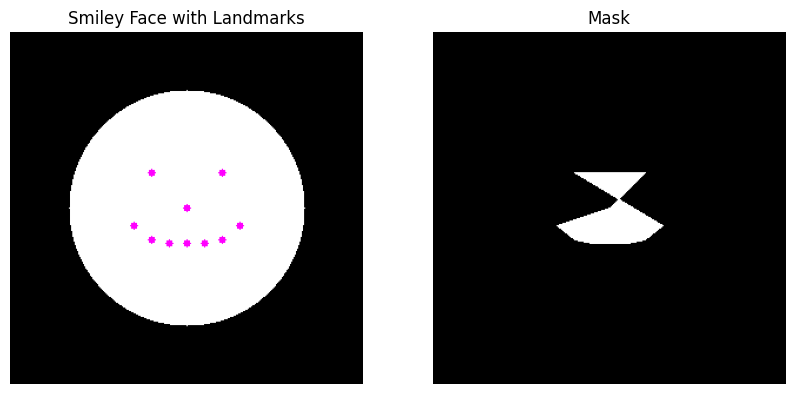

In [3]:
# Generate a random smiley face image
smiley_face, center, size = generate_smiley_face(size=300)

# Add landmarks to the smiley face image
smiley_face_with_landmarks, landmarks = add_landmarks(smiley_face, center, size)

# Create mask for the smiley face image
mask = create_mask(smiley_face, landmarks)

# Display the smiley face image with landmarks and mask using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(smiley_face_with_landmarks, cv2.COLOR_BGR2RGB))
plt.title('Smiley Face with Landmarks')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.show()


In [4]:
# Function to generate a random smiley face image
def generate_smiley_face(size):
    # Generate a blank image
    image = np.zeros((size, size, 3), dtype=np.uint8)

    # Draw a circle for the face
    center = (size // 2, size // 2)
    radius = size // 3


    cv2.circle(image, center, radius, (255, 255, 255), -1)

    return image, center, size

# Function to add landmarks to the smiley face image
def add_landmarks(image, center, size):
    # Define landmark points (e.g., for eyes, nose, and mouth)
    # Example: For a simple smiley face, you might define landmarks for eyes, nose, and mouth
    landmarks = {
        'left_eye': (int(center[0] - size * 0.15), int(center[1] - size * 0.1)),
        'right_eye': (int(center[0] + size * 0.15), int(center[1] - size * 0.1)),
        'nose': (int(center[0]), int(center[1])),
        'mouth_left_top_top': (int(center[0] - size * 0.15), int(center[1] + size *0.05)),
        'mouth_left_top': (int(center[0] - size * 0.1), int(center[1] + size * 0.09)),
        'mouth_top': (int(center[0] - size * 0.05), int(center[1] + size * 0.1)),
        'mouth_middle': (int(center[0] ), int(center[1] + size * 0.1)),
        'mouth_bottom': (int(center[0] + size * 0.05), int(center[1] + size * 0.1)),
        'mouth_right_bottom': (int(center[0] + size * 0.1), int(center[1] + size * 0.09)),
        'mouth_right_bottom_bottom': (int(center[0] + size * 0.15), int(center[1] + size * 0.05))
    }

    # Add points along the perimeter of the circle
    perimeter_points = []
    for angle in range(0, 360, 30):  # Adjust the step size as needed
        x = int(center[0] + (size // 3) * np.cos(np.deg2rad(angle)))
        y = int(center[1] + (size // 3) * np.sin(np.deg2rad(angle)))
        perimeter_points.append((x, y))

    # Add perimeter points to landmarks
    for i, point in enumerate(perimeter_points):
        landmarks[f'perimeter_{i}'] = point

    # Draw landmarks on the image
    for landmark, (x, y) in landmarks.items():
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

    return image, landmarks

# Function to create mask for the smiley face image
def create_mask(image, landmarks):
    # Create a mask initialized with zeros
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Define the region of interest (ROI) using the landmarks
    # Example: In a simple smiley face, the ROI might be the area inside the circle
    roi_points = list(landmarks.values())

    # Fill the ROI with white color in the mask
    cv2.fillPoly(mask, [np.array(roi_points)], (255))

    return mask



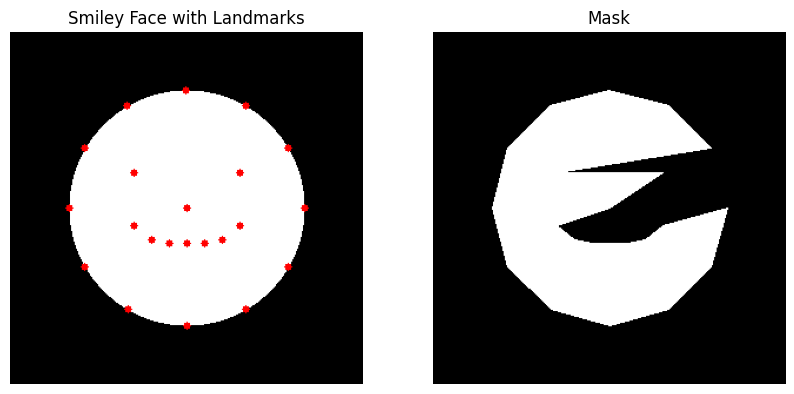

In [5]:
# Generate a random smiley face image
smiley_face, center, size = generate_smiley_face(size=300)

# Add landmarks to the smiley face image
smiley_face_with_landmarks, landmarks = add_landmarks(smiley_face, center, size)

# Create mask for the smiley face image
mask = create_mask(smiley_face, landmarks)

# Display the smiley face image with landmarks and mask using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(smiley_face_with_landmarks, cv2.COLOR_BGR2RGB))
plt.title('Smiley Face with Landmarks')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.show()

In [6]:
import numpy as np
import cv2

# Function to generate a random smiley face image
def generate_smiley_face(size):
    # Generate a blank image
    image = np.zeros((size, size, 3), dtype=np.uint8)

    # Draw a circle for the face
    center = (size // 2, size // 2)
    radius = size // 3
    cv2.circle(image, center, radius, (128, 128, 128), -1)

    # Draw circles for the eyes
    eye_radius = radius // 4
    left_eye_center = (center[0] - radius // 2, center[1] - radius // 3)
    right_eye_center = (center[0] + radius // 2, center[1] - radius // 3)
    cv2.circle(image, left_eye_center, eye_radius, (255, 255, 255), -1)
    cv2.circle(image, right_eye_center, eye_radius, (255, 255, 255), -1)

    # Draw a region for the nose
    nose_center = (center[0], center[1] + radius // 15)
    nose_radius = radius // 8
    cv2.circle(image, nose_center, nose_radius, (255, 255, 255), -1)

    # Draw a region for the mouth
    mouth_start = (center[0] - radius // 2, center[1] + radius // 3)
    mouth_end = (center[0] + radius // 2, center[1] + radius // 2)
    cv2.rectangle(image, mouth_start, mouth_end, (255, 255, 255), -1)

    return image, center, size




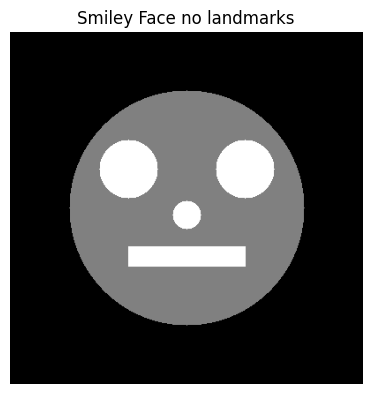

In [7]:
# Generate smiley face image
size = 400
smiley_face, center, size = generate_smiley_face(size)
# Display the smiley face image with landmarks and mask using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(smiley_face, cv2.COLOR_BGR2RGB))
plt.title('Smiley Face no landmarks')
plt.axis('off')

plt.show()


# drawing with opencv

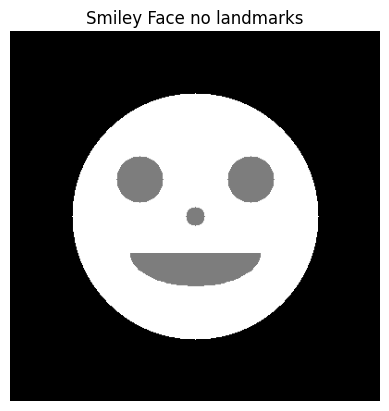

In [8]:
def make_smiley_face(size):
  image = np.zeros((size, size, 3), dtype=np.uint8)
  image = cv2.circle(image, center, size // 3, (255, 255, 255), -1)
  image = cv2.circle(image, center=(int(center[0] - size * 0.15), int(center[1] - size * 0.1)), radius=25, color=(125, 125, 125), thickness=-1)
  image = cv2.circle(image, center=(int(center[0] + size * 0.15), int(center[1] - size * 0.1)), radius=25, color=(125, 125, 125), thickness=-1)
  image = cv2.circle(image, center=(int(center[0]), int(center[1])), radius=10, color=(125, 125, 125), thickness=-1)
  image = cv2.ellipse(image, (int(center[0]), int(center[1] + size * 0.1)), (70, 35), 0, 0, 180, (125, 125, 125), -1)
  return image

# Generate smiley face image
size = 400
image = make_smiley_face(size)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Smiley Face no landmarks')
plt.axis('off')
plt.show()

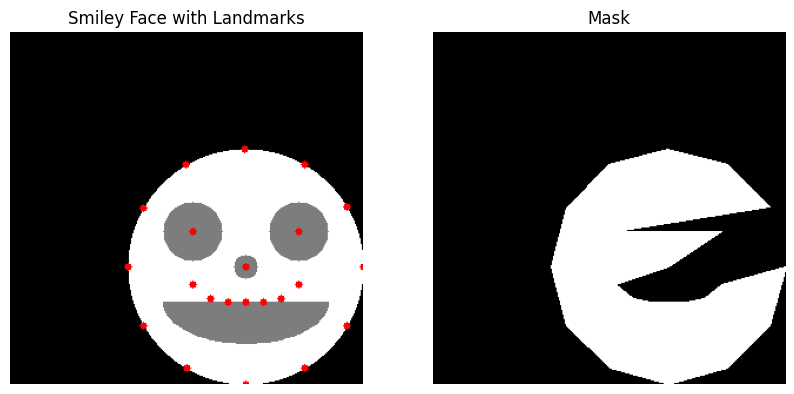

In [9]:
# Generate a random smiley face image
size = 300
smiley_face = make_smiley_face(size)

# Add landmarks to the smiley face image
smiley_face_with_landmarks, landmarks = add_landmarks(smiley_face, center, size)

# Create mask for the smiley face image
mask = create_mask(smiley_face, landmarks)

# Display the smiley face image with landmarks and mask using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(smiley_face_with_landmarks, cv2.COLOR_BGR2RGB))
plt.title('Smiley Face with Landmarks')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.show()